# Welcome to the cooltools visualization notebook!


Visualization is a crucial part of analyzing large-scale datasets. Before performing any analyses of new Hi-C datasets, it is highly recommend to visualize the data. This notebook contains tips and tricks for visualization of coolers using cooltools.


In [2]:
# import open2c packages
import bioframe
import cooler
import cooltools


# import standard python libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
### currently grabbing data with: osf -p hjcxg fetch osfstorage/test.mcool ./test.mcool

### need to figure out how to use osfclient... 
### osfclient.cli.fetch('hjcxg/osfstorage/test.mcool') doesn't work.

### load in a test cooler. 
- note that test.mcool contains multiple resolutions in a multi-cooler format:
- cooler.readthedocs.io/en/latest/schema.html?highlight=mcool#multi-resolution
- this example cooler has two chromosomes at 1Mb resolution


In [28]:
### to load a cooler with a specific resolution use the following syntax:
clr = cooler.Cooler('./test.mcool::resolutions/1000000')

print('chromosomes:', clr.chromnames,', binsize:', clr.binsize)
### chromosome start/ends in bins
chromstarts = []
for i in clr.chromnames:
    print(i,':', clr.extent(i) )
    chromstarts.append(clr.extent(i)[0])

chromosomes: ['chr2', 'chr17'] , binsize: 1000000
chr2 : (0, 243)
chr17 : (243, 327)


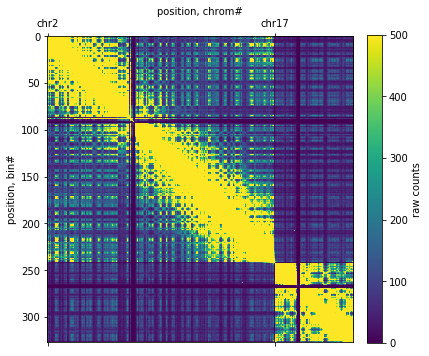

In [45]:
### plot the raw data ###
plt.figure(figsize=(6,6))
im = plt.matshow((clr.matrix(balance=False)[:]),fignum=False,vmax=500); 
plt.colorbar(im ,fraction=0.046, pad=0.04, label='raw counts');
plt.xticks(chromstarts,clr.chromnames);
plt.xlabel('position, chrom#')
plt.ylabel('position, bin#')
ax = plt.gca()
ax.xaxis.set_label_position('top')

# passing [:] to clr.matrix indicates selection of all bins. 
# (balance=False) indicates selection of raw data, without removal of biases.
# this data represents counts of pairwise contact frequencies
# notice that there are higher contact frequencies within a chromosome as opposed to between chromosomes

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


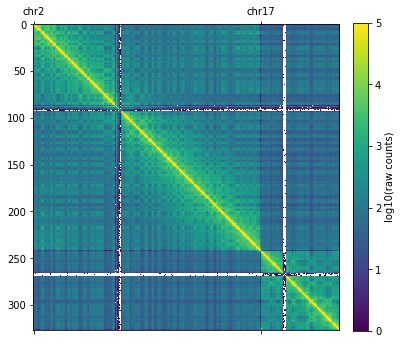

In [23]:
### plot the raw data in logscale ###
plt.figure(figsize=(6,6))
im = plt.matshow(np.log10(clr.matrix(balance=False)[:]), vmax=5,fignum=False); 
plt.colorbar(im ,fraction=0.046, pad=0.04, label='log10(raw counts)');
plt.xticks(chromstarts,clr.chromnames);

# its often useful to plot Hi-C data in log scale. Here zeros are evident as white stripes. 
# note that sparse white stripes appear at both centromeres. 


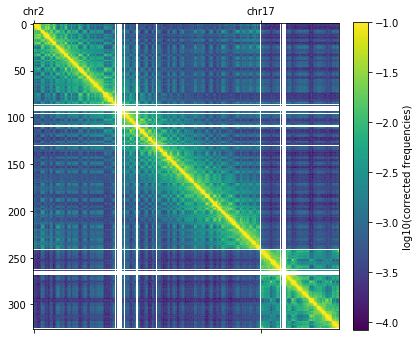

In [31]:
### plot the corrected data in logscale ###
plt.figure(figsize=(6,6))
im = plt.matshow(np.log10(clr.matrix()[:]), vmax=-1,fignum=False); 
plt.colorbar(im ,fraction=0.046, pad=0.04, label='log10(corrected frequencies)');
plt.xticks(chromstarts,clr.chromnames);

# note that scale differs after balancing: the rows & columns of the matrix are now normalized to sum to one
# also note that peri-centromeric bins have been completely removed in the normalized data


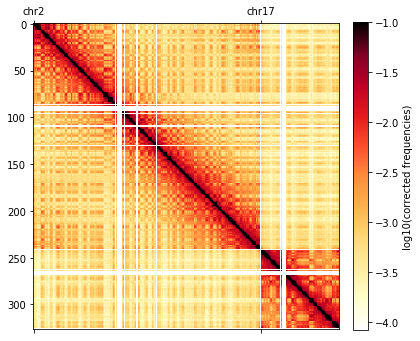

In [32]:
### plot the corrected data in fall heatmap ###

from cooltools.lib.plotting import *

plt.figure(figsize=(6,6))
im = plt.matshow(np.log10(clr.matrix()[:]), vmax=-1,fignum=False, cmap='fall'); 
plt.colorbar(im ,fraction=0.046, pad=0.04, label='log10(corrected frequencies)');
plt.xticks(chromstarts,clr.chromnames);

# fall colormap offers a high dynamic range, linear, option for visualizing Hi-C matrices

In [ ]:
### todo: 
# - adaptive coarsegrain
# - zoom into higher resolution
